In [ ]:
# Install Ultralytics (YOLOv8) dan Roboflow SDK
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [ ]:
from roboflow import Roboflow

# Inisialisasi API
rf = Roboflow(api_key="S4xMwV6xej7eyEhacdsA")
project = rf.workspace("car-parking-space").project("parking-spot-detector-a84ql")
version = project.version(1)

# Download dataset dalam format YOLOv8
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to parking-spot-detector-1 in yolov8:: 100%|██████████| 3050/3050 [00:00<00:00, 5398.29it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import yaml

# Cek isi data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as f:
    data_yaml = yaml.safe_load(f)

print("Classes:", data_yaml['names'])


Classes: ['empty', 'occupied']


In [ ]:
from ultralytics import YOLO

# Buat model baru (gunakan 'yolov8n.pt' / 'yolov8s.pt' dll)
model = YOLO('yolov8s.pt')  # atau 'yolov8n.pt' untuk lebih ringan

# Mulai training
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=30,
    imgsz=416,
    batch=16
)


100%|██████████| 21.5M/21.5M [00:00<00:00, 388MB/s]


Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/parking-spot-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 94.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,136,374 parameters, 11,136,358 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 283MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1640.8±730.8 MB/s, size: 80.0 KB)


train: Scanning /content/parking-spot-detector-1/train/labels... 1379 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1379/1379 [00:01<00:00, 1180.30it/s]


train: New cache created: /content/parking-spot-detector-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21693, len(boxes) = 27260. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 586.1±459.1 MB/s, size: 93.4 KB)


val: Scanning /content/parking-spot-detector-1/valid/labels... 119 images, 1 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<00:00, 1032.72it/s]

val: New cache created: /content/parking-spot-detector-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2087, len(boxes) = 2536. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.44G      1.338      1.197      1.237        158        416: 100%|██████████| 87/87 [00:20<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        119       2536      0.926      0.911      0.949      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.64G     0.8966     0.5923     0.9995         21        416: 100%|██████████| 87/87 [00:19<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        119       2536       0.95      0.883      0.941      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.68G     0.8128     0.5436     0.9743         87        416: 100%|██████████| 87/87 [00:17<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        119       2536      0.948      0.868       0.93      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.71G     0.7642     0.5022       0.95         74        416: 100%|██████████| 87/87 [00:17<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all        119       2536      0.946      0.926      0.965       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.75G     0.7179     0.4764     0.9429         59        416: 100%|██████████| 87/87 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        119       2536      0.954      0.928      0.963      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.77G     0.6811      0.452     0.9279        111        416: 100%|██████████| 87/87 [00:17<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        119       2536      0.954      0.937      0.966      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.99G     0.6419     0.4221     0.9166        129        416: 100%|██████████| 87/87 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        119       2536      0.965      0.936      0.971      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.03G     0.6222     0.4116     0.9107        130        416: 100%|██████████| 87/87 [00:17<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        119       2536      0.952       0.94       0.97      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.06G     0.5874     0.3938     0.8987        111        416: 100%|██████████| 87/87 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        119       2536       0.96      0.949      0.974      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.09G     0.5787     0.3851     0.8989        153        416: 100%|██████████| 87/87 [00:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        119       2536      0.958      0.948       0.97      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.14G     0.5766     0.3889     0.9014        103        416: 100%|██████████| 87/87 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        119       2536      0.936      0.933      0.966      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.17G     0.5502     0.3743     0.8904         71        416: 100%|██████████| 87/87 [00:17<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        119       2536      0.956      0.935      0.965      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.21G     0.5434       0.36     0.8843         53        416: 100%|██████████| 87/87 [00:17<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        119       2536       0.95      0.958      0.971      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.23G     0.5331     0.3557     0.8853         25        416: 100%|██████████| 87/87 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


                   all        119       2536      0.964      0.947      0.976      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.28G     0.5344      0.356     0.8848         70        416: 100%|██████████| 87/87 [00:17<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        119       2536      0.969      0.947      0.974      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.32G     0.5079     0.3433     0.8792         25        416: 100%|██████████| 87/87 [00:17<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        119       2536      0.961      0.945      0.974      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.35G     0.4927     0.3268     0.8748        137        416: 100%|██████████| 87/87 [00:17<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        119       2536      0.959      0.951      0.975      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.38G     0.4824     0.3233     0.8708         56        416: 100%|██████████| 87/87 [00:17<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        119       2536       0.97      0.949      0.979      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.43G     0.4819     0.3175     0.8713         50        416: 100%|██████████| 87/87 [00:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        119       2536      0.965      0.954      0.974      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.47G     0.4707     0.3122     0.8669         48        416: 100%|██████████| 87/87 [00:17<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        119       2536       0.96      0.951      0.976      0.909


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       3.5G     0.4414     0.2892      0.861         48        416: 100%|██████████| 87/87 [00:17<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        119       2536      0.954      0.957      0.975      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.52G     0.4383     0.2873     0.8595         52        416: 100%|██████████| 87/87 [00:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        119       2536      0.966       0.95      0.976      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.57G     0.4505     0.2925     0.8651         22        416: 100%|██████████| 87/87 [00:16<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        119       2536      0.964      0.954      0.974      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.61G      0.419     0.2755     0.8535         72        416: 100%|██████████| 87/87 [00:17<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        119       2536      0.976      0.952      0.977      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.64G     0.3923     0.2603     0.8413         78        416: 100%|██████████| 87/87 [00:16<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        119       2536      0.974      0.956      0.978      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.67G     0.3876     0.2557     0.8425         22        416: 100%|██████████| 87/87 [00:17<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        119       2536      0.977      0.952      0.977      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.72G     0.3729      0.248     0.8423         64        416: 100%|██████████| 87/87 [00:17<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        119       2536      0.971      0.955      0.977      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.75G     0.3653     0.2423     0.8392         77        416: 100%|██████████| 87/87 [00:17<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        119       2536      0.978      0.947      0.976       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.79G     0.3627     0.2423     0.8441         52        416: 100%|██████████| 87/87 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]


                   all        119       2536      0.973      0.958      0.977      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.81G     0.3512     0.2334     0.8362         19        416: 100%|██████████| 87/87 [00:17<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        119       2536      0.972      0.957      0.977       0.92



30 epochs completed in 0.160 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


                   all        119       2536      0.978      0.947      0.976       0.92
                 empty        113        743      0.966      0.927      0.971      0.875
              occupied        102       1793       0.99      0.967       0.98      0.964
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d54fbad9110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

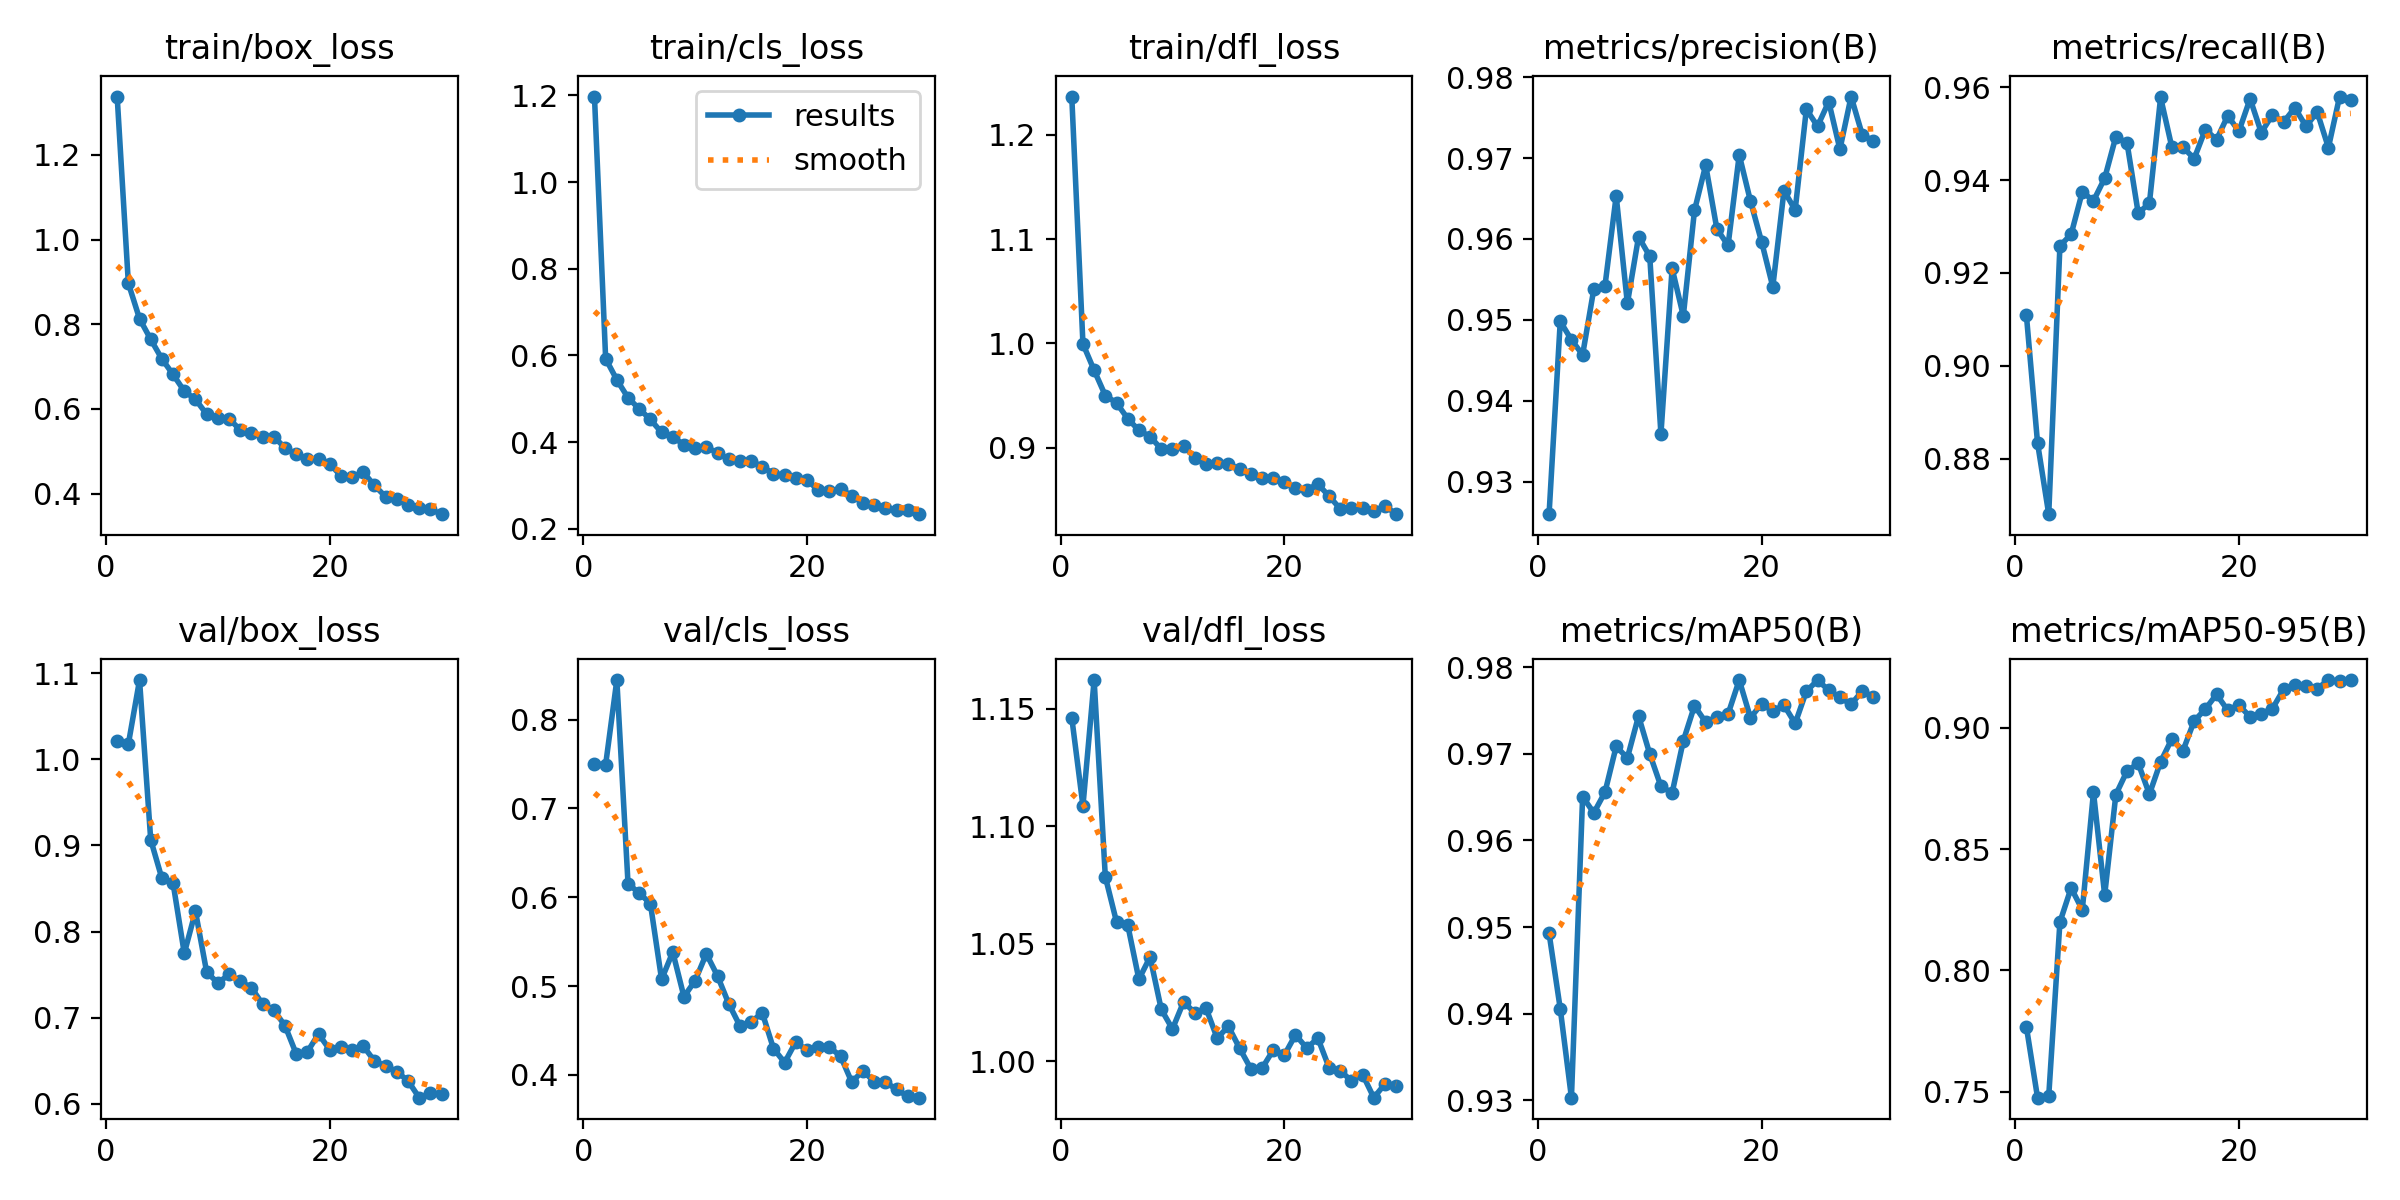

In [ ]:
from IPython.display import Image

# Gambar hasil training (jika tersedia)
Image(filename='runs/detect/train/results.png', width=700)


In [ ]:
# Gunakan model hasil training terbaik
model = YOLO('runs/detect/train/weights/best.pt')

# Lakukan deteksi
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.25,
    save=True  # hasil akan tersimpan di runs/detect/predict
)



image 1/21 /content/parking-spot-detector-1/test/images/2022-11-15-14-09-20_mp4-38_jpg.rf.3a5808ed7f30028db64e9c2423304a64.jpg: 416x416 2 emptys, 4 occupieds, 10.3ms
image 2/21 /content/parking-spot-detector-1/test/images/2022-11-15-14-11-26_mp4-37_jpg.rf.a368384b115412a38ec594eb9a0c172f.jpg: 416x416 3 emptys, 4 occupieds, 10.2ms
image 3/21 /content/parking-spot-detector-1/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-117_jpg.rf.96abf782a7cb9561b17c06a8442b2f3e.jpg: 416x416 15 emptys, 42 occupieds, 10.3ms
image 4/21 /content/parking-spot-detector-1/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-137_jpg.rf.afc6730f9dbfb65e3b7c5112cdc3b00a.jpg: 416x416 15 emptys, 43 occupieds, 10.1ms
image 5/21 /content/parking-spot-detector-1/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-219_jpg.rf.460253615a1f19060f1d041441dab256.jpg: 416x416 13 emp

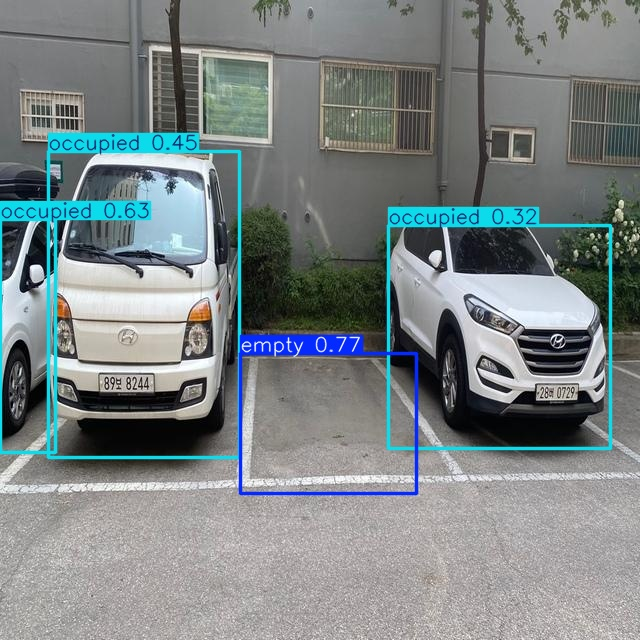

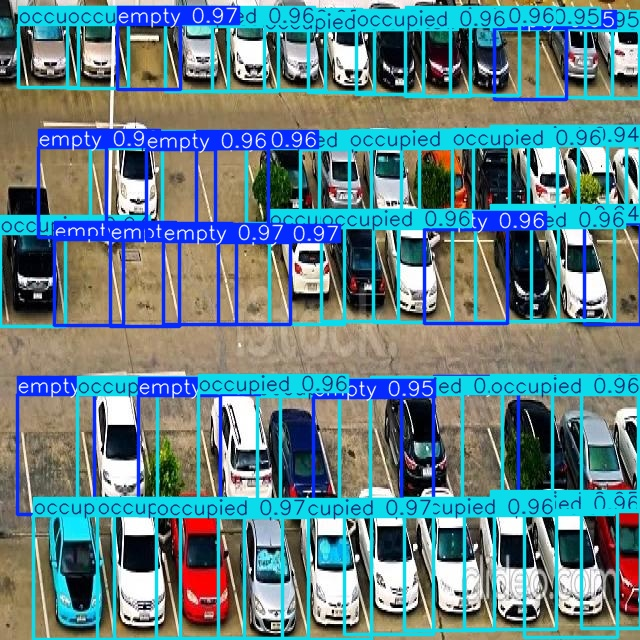

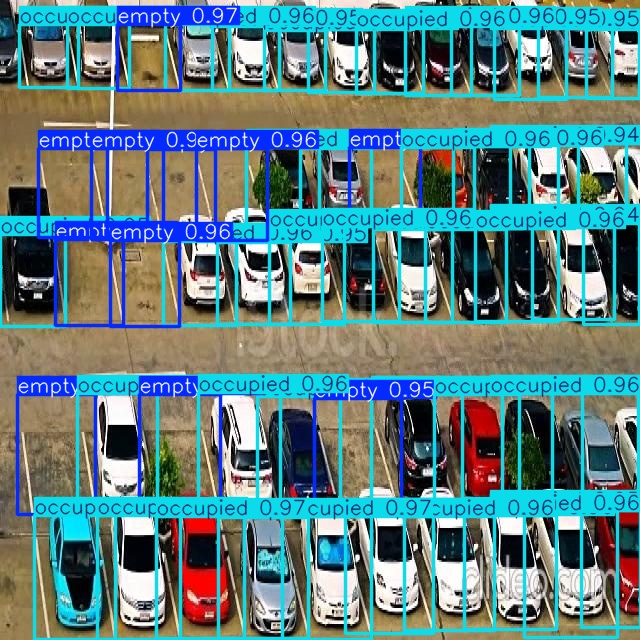

In [ ]:
import glob
from IPython.display import Image, display

detected_images = glob.glob('runs/detect/predict/*.jpg')

for img_path in detected_images[:3]:  # tampilkan 3 hasil pertama
    display(Image(filename=img_path, width=600))


In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>